In [1]:
%matplotlib inline
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 4.912 Seconds
Building M ...
	Done. Took 18.733 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 5.706
	Done. Took 1068.731 Seconds
Extracting Qis ...
	Done. Took 0.003 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- CVX: -8.993*(-0.031)^t + 0.049*(0.781)^t + -3.623*(-0.029)^t + -1.840*(-0.024)^t + 14.406698 * delta(t,0)
		RMSE = 0.005
		Matlab: [-8.99 -0.03  0.05  0.78 -3.62 -0.03 -1.84 -0.02]
	Done. Took 71.393 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- C: 3.897*(0.161)^t + -1.997*(0.334)^t + 2.105*(-0.025)^t + 0.518*(0.497)^t + -4.523949 * delta(t,0)
		RMSE = 0.008
		Matlab: [ 3.9   0.16 -2.    0.33  2.1  -0.02  0.52  0.5 ]
	Done. Took 26.667 Seconds
Learning Convolution for Q(1,4) ...
	Q(1,4) XOM <-- JPM: -0.563*(0.157)^t + 0.611*(0.014)^t + 1.450*(0.103)^t + -6.280*(-0.020)^t + 4.781540 * d

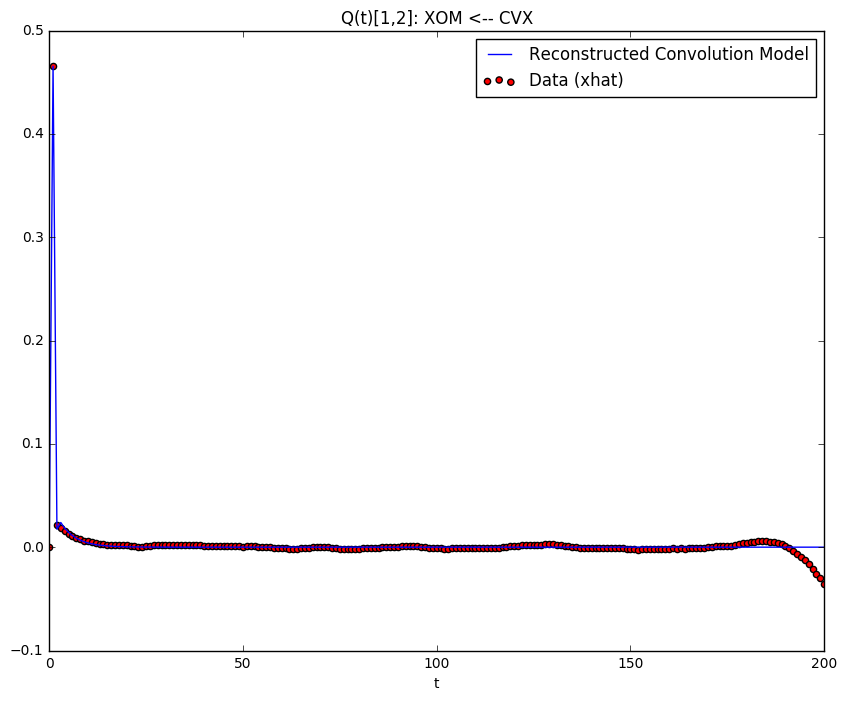

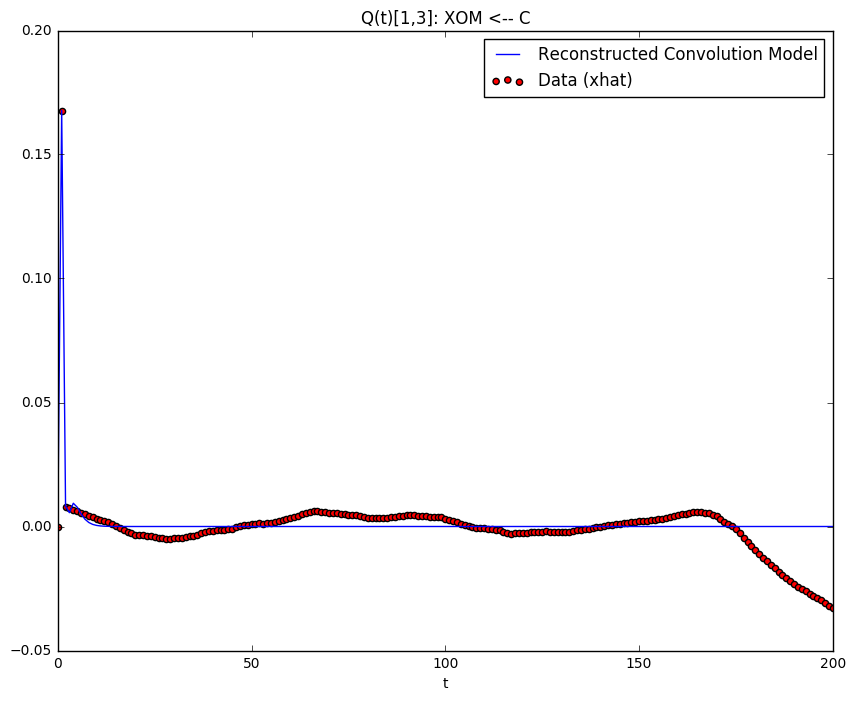

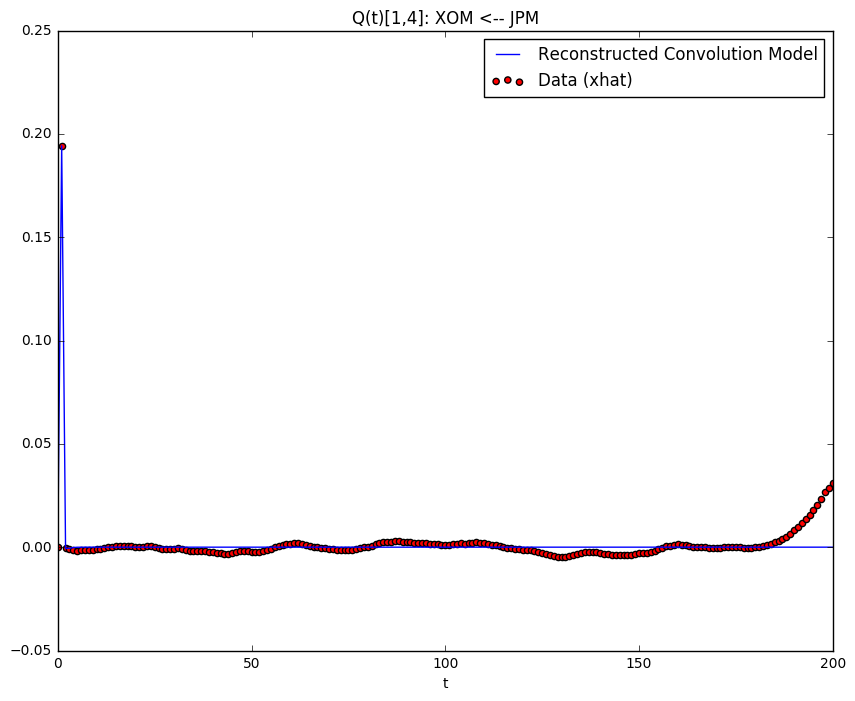

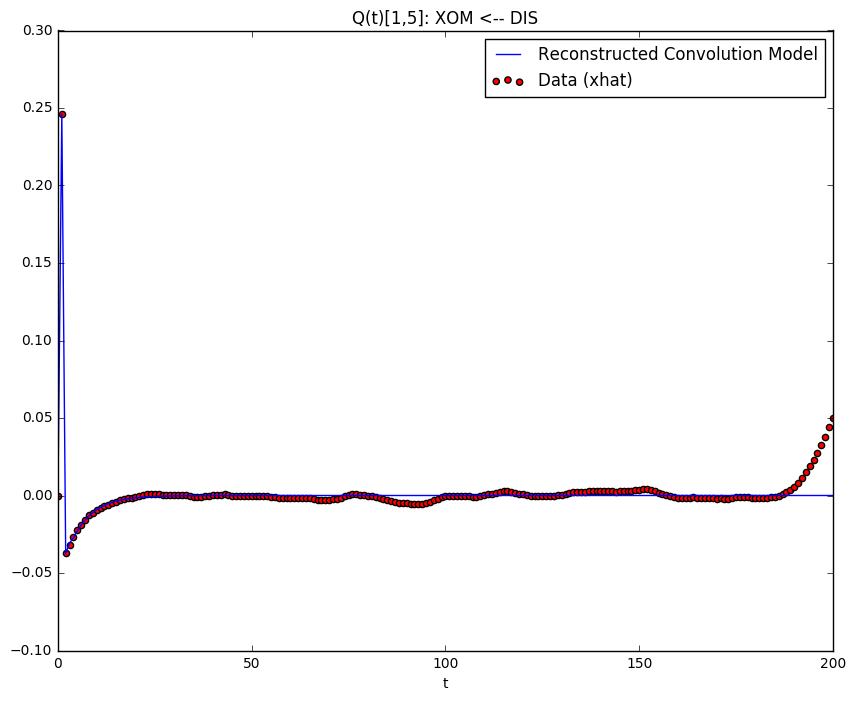

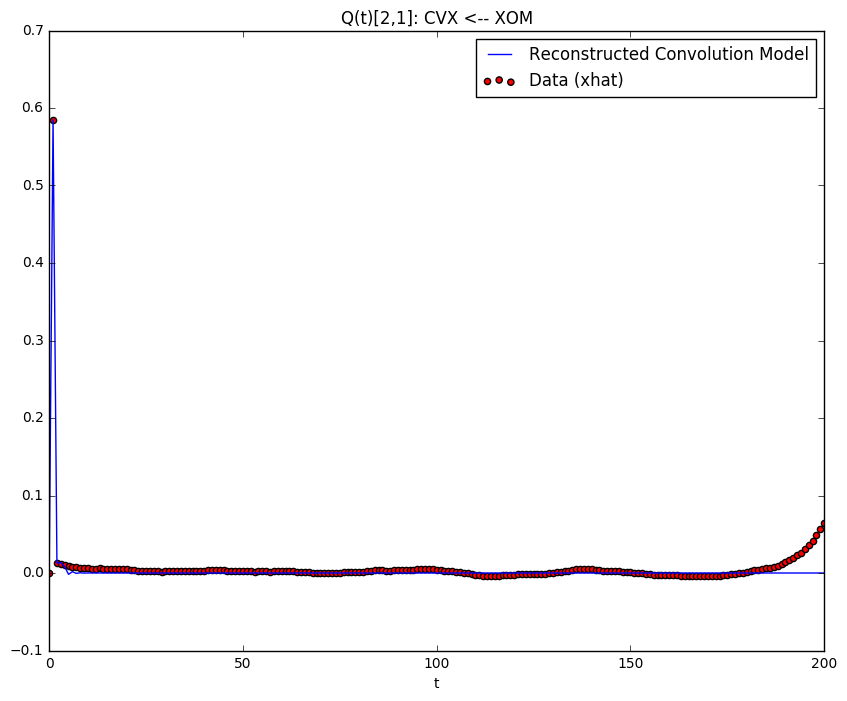

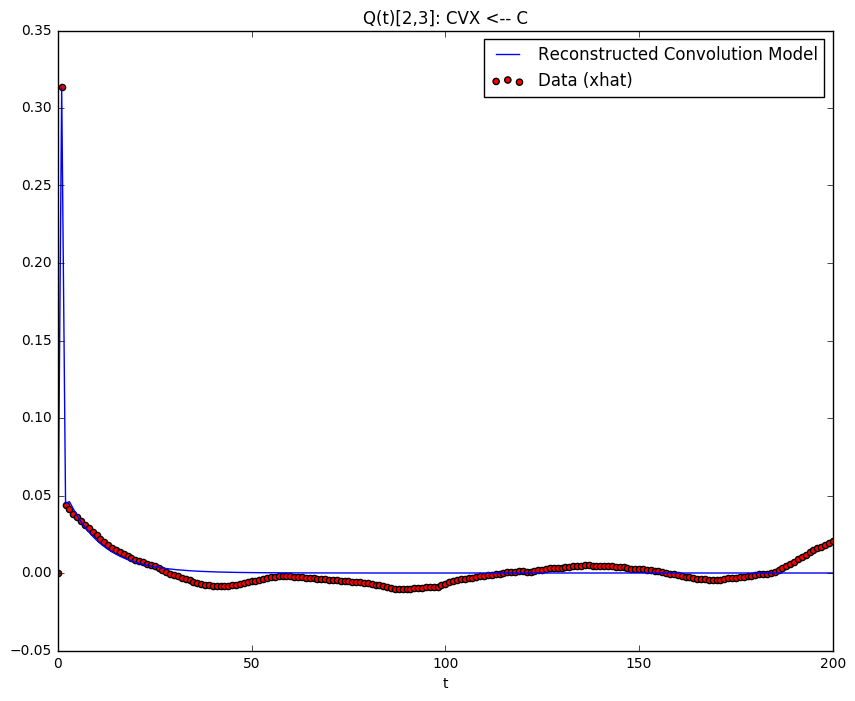

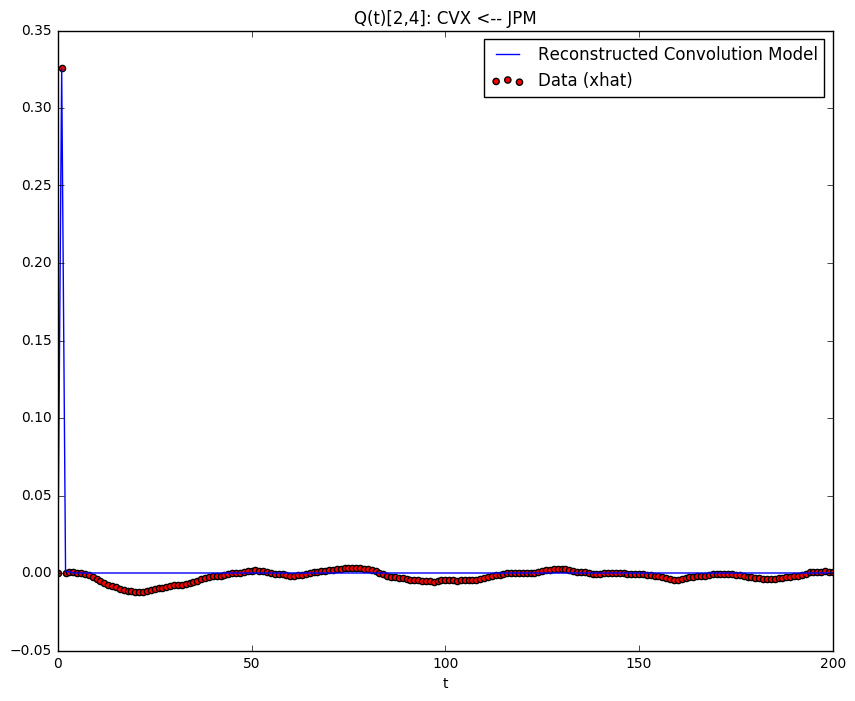

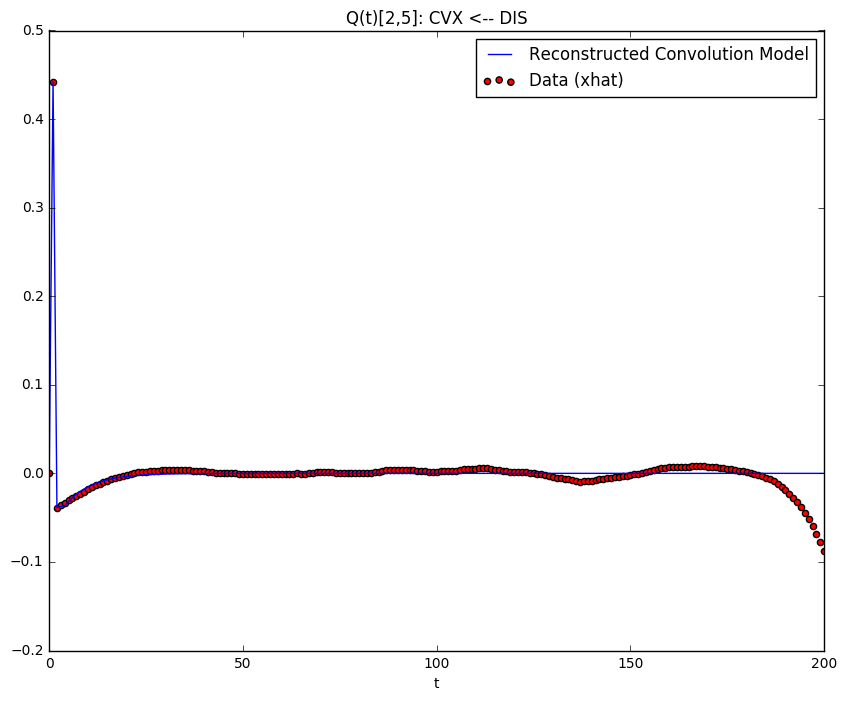

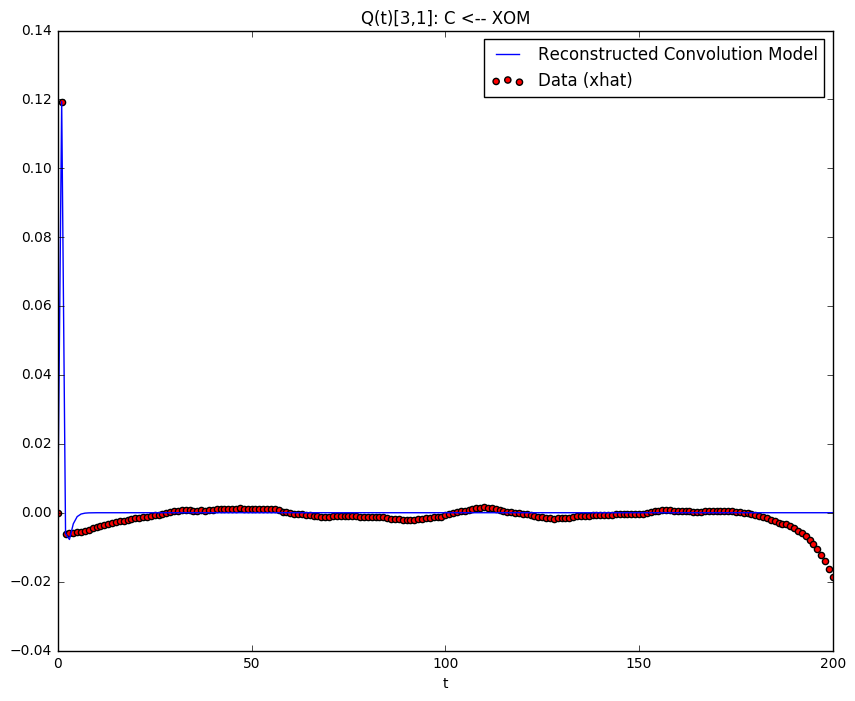

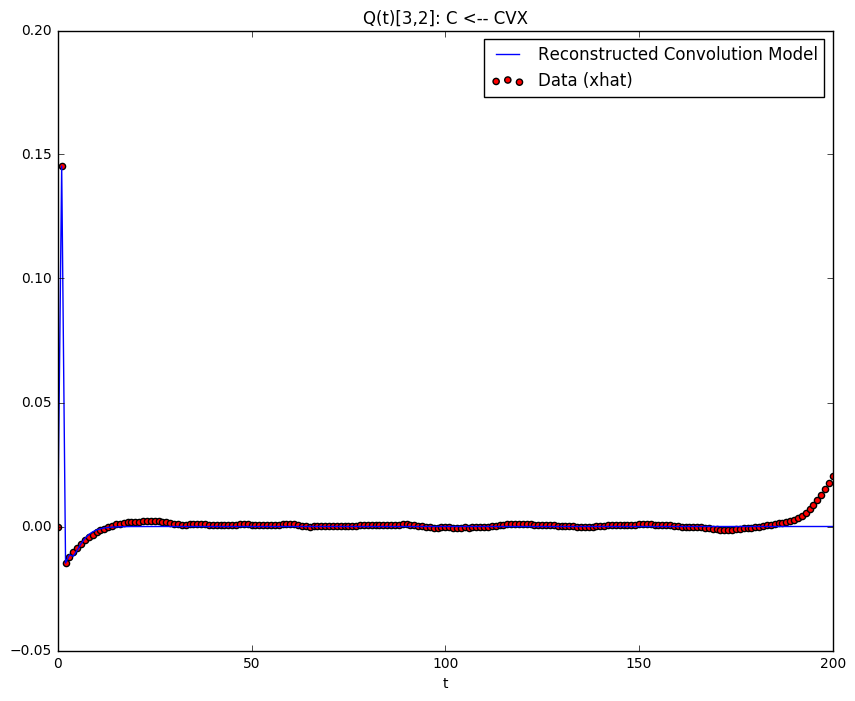

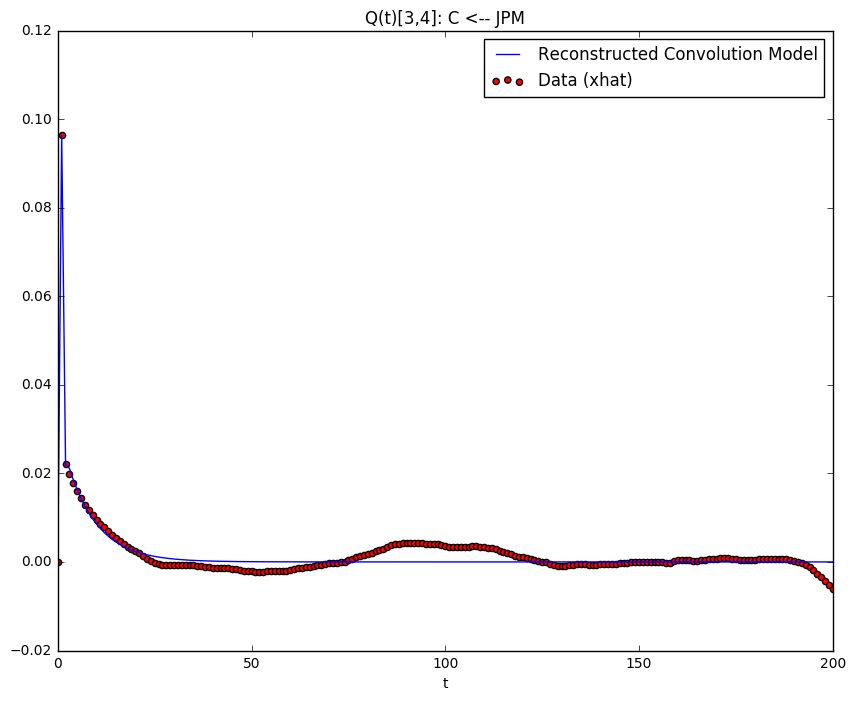

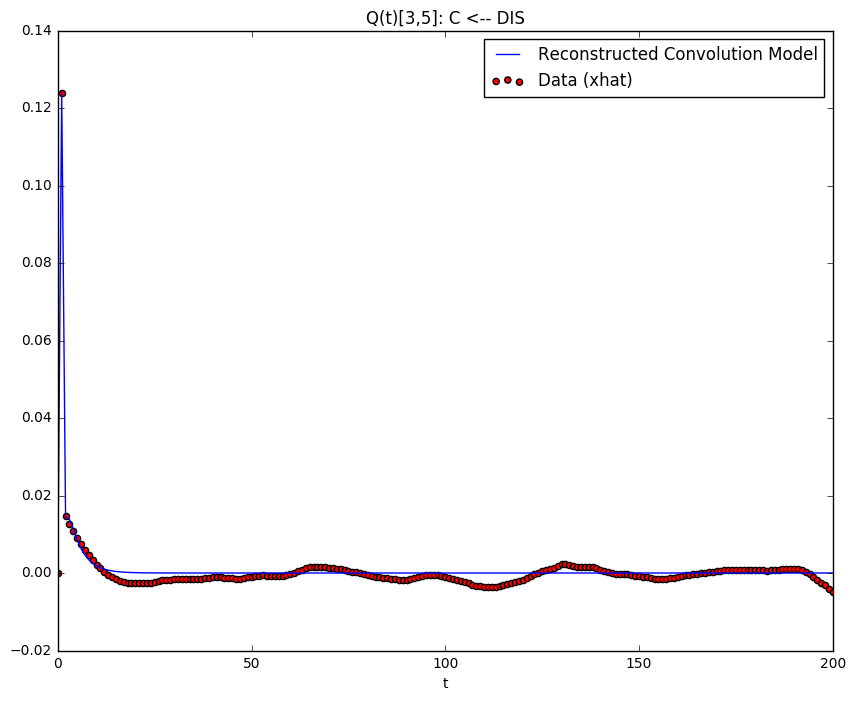

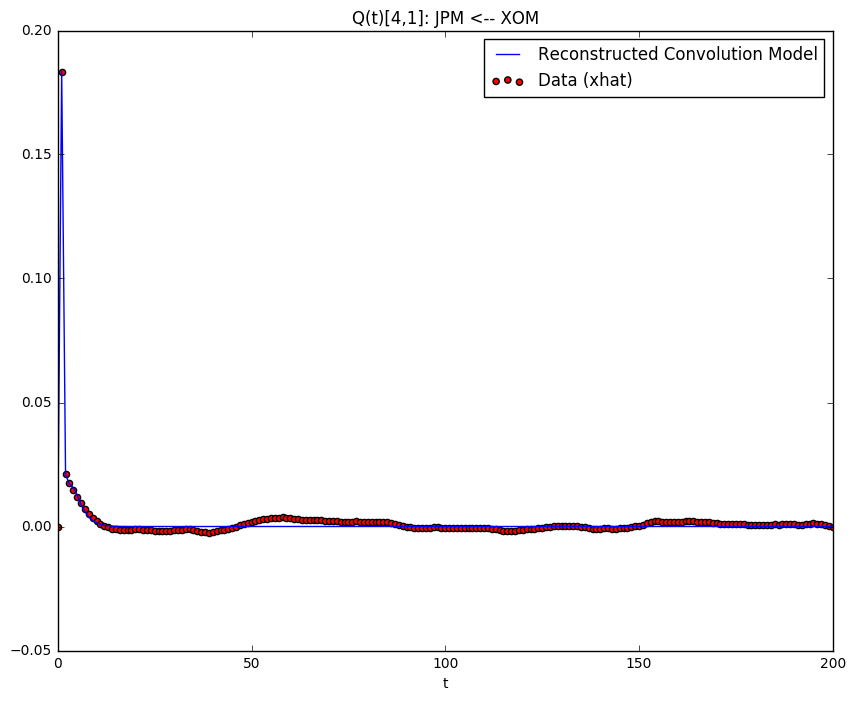

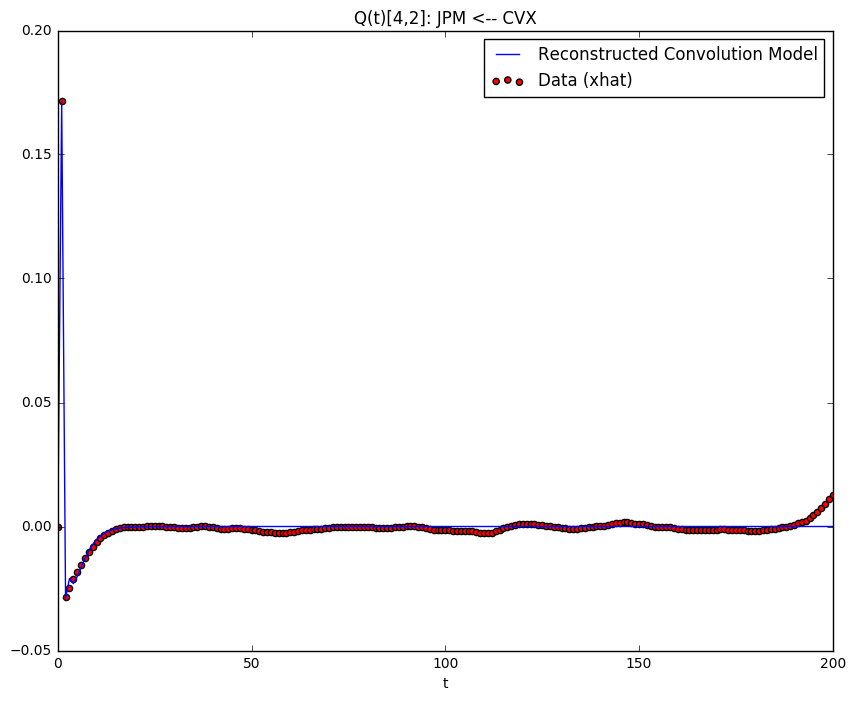

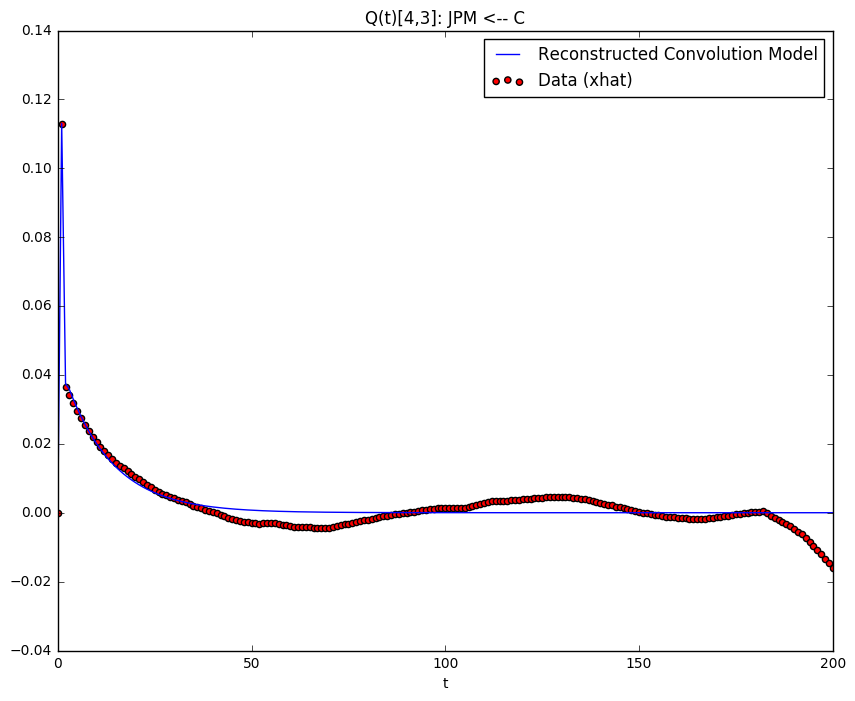

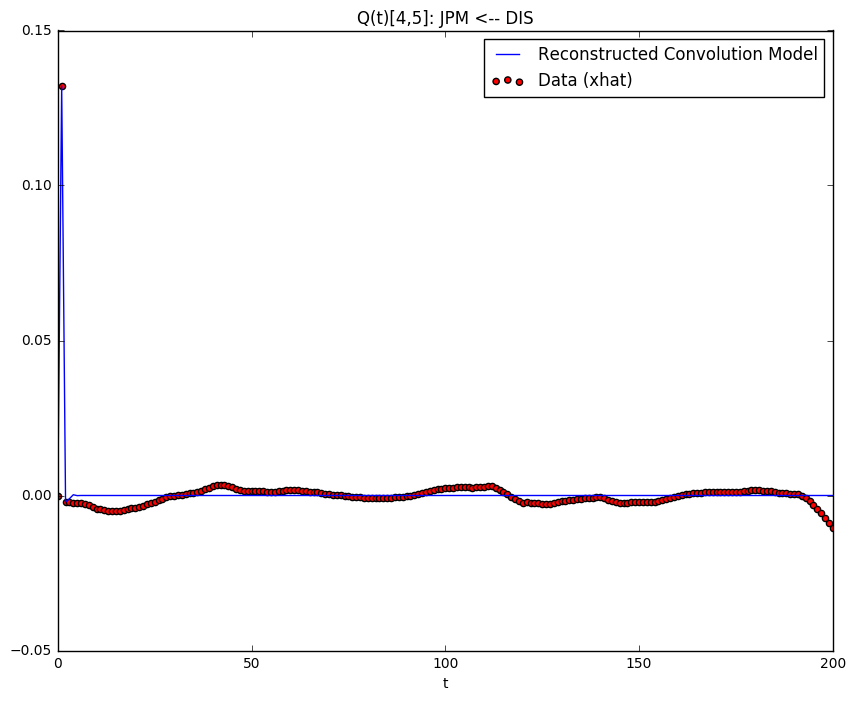

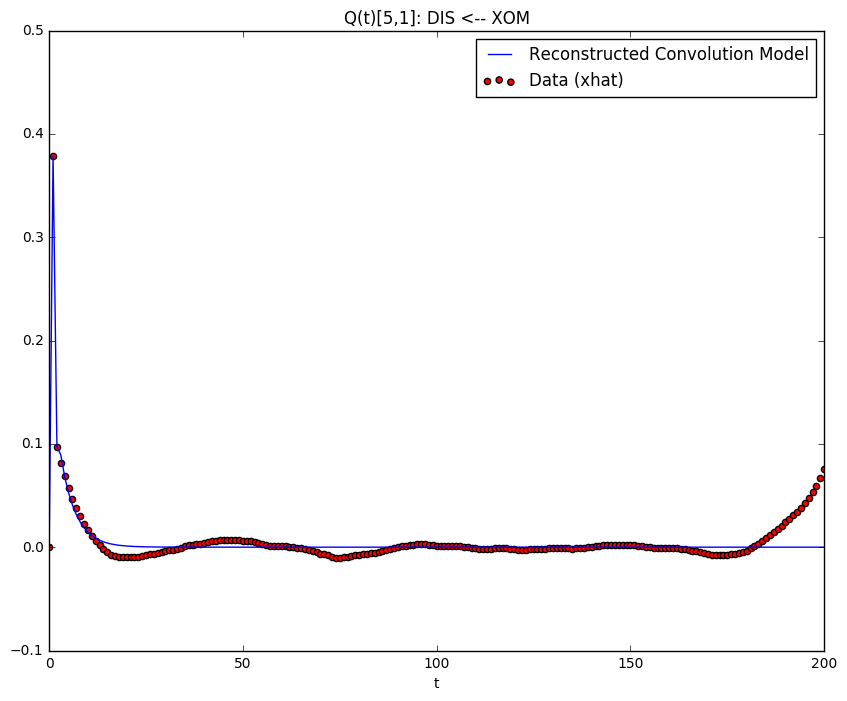

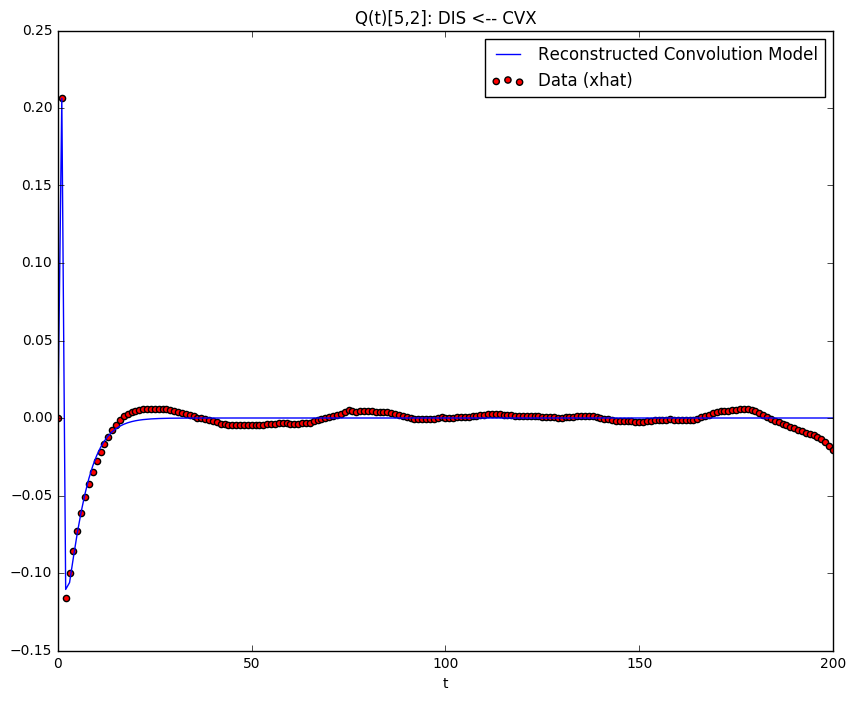

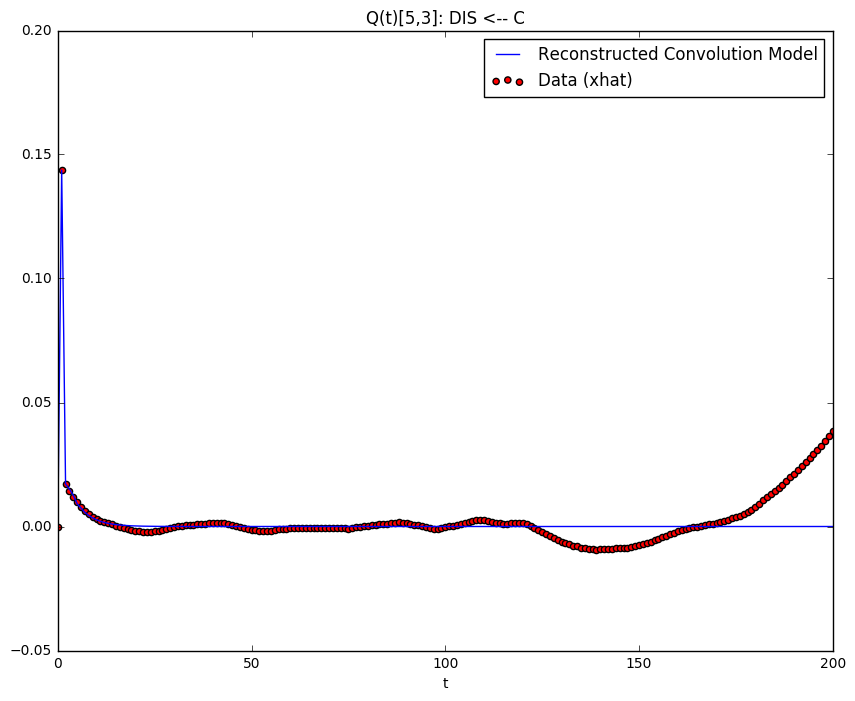

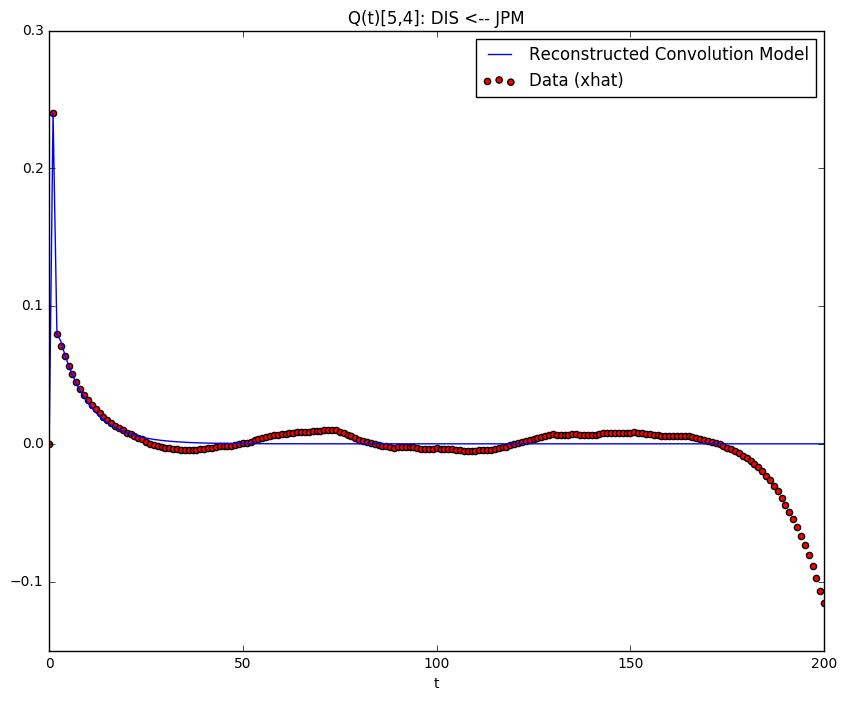

In [2]:
cols = ['XOM', 'CVX', 'C', 'JPM', 'DIS']
df = pd.read_csv('decisecond.csv', index_col=0, parse_dates=True)
y = df[cols].values

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [3]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-8.99251059385 -0.030971970765 0.0493909204062 0.780625411631 -3.62316429455 -0.0289694490816 -1.84041379376 -0.0235578795547 ; 3.89722511416 0.161481688604 -1.9965161641 0.333939622249 2.10480699115 -0.0248824995114 0.518433205817 0.49670367762 ; -0.562715560298 0.156555803881 0.610803415827 0.0135520338673 1.45003759495 0.103381667635 -6.2796656065 -0.0197641310961 ; -0.0566689797014 0.833264302229 1.21589040025 0.0991487633894 -4.96548034668 -0.0184486616869 -0.787044356625 -0.103139998393 ; 0.408372929996 0.304788701267 4.08222093832 -0.335305922914 1.9749229666 0.0964042869372 -5.3456218144 -0.30653258719 ; 0.0946497293148 -0.167423202089 -8.13725624348 -0.0340529275127 0.544869963581 -0.0102536585462 0.0644585708346 0.894763205144 ; -8.56200470868 -0.0280253022478 0.210910513318 0.109958832696 0.715614053301 0.0846912035628 -0.415258501675 -0.00444278874486 ; -0.0665006103456 0.862728350422 2.0203948826 0.123136034444 -7.55618321631 -0.0642732260651 4.8576717832 

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 4.834 Seconds
Building M ...
	Done. Took 17.783 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 23 iterations
	Done. Took 8.865 Seconds
Extracting Qis ...
	Done. Took 0.004 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- CVX: -2.526*(-0.006)^t + -0.115*(0.058)^t + -2.298*(-0.023)^t + 8.288*(0.014)^t + -3.350134 * delta(t,0)
		RMSE = 0.000
		Matlab: [-2.53 -0.01 -0.11  0.06 -2.3  -0.02  8.29  0.01]
	Done. Took 89.530 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- C: 0.060*(-0.020)^t + -1.899*(-0.031)^t + 1.495*(-0.035)^t + -0.948*(0.006)^t + 1.291922 * delta(t,0)
		RMSE = 0.000
		Matlab: [ 0.06 -0.02 -1.9  -0.03  1.49 -0.03 -0.95  0.01]
	Done. Took 86.680 Seconds
Learning Convolution for Q(1,4) ...
	Q(1,4) XOM <-- JPM: 0.173*(0.003)^t + 0.131*(0.007)^t + -0.980*(0.000)^t + -0.103*(0.009)^t + 0.779457 * delta(

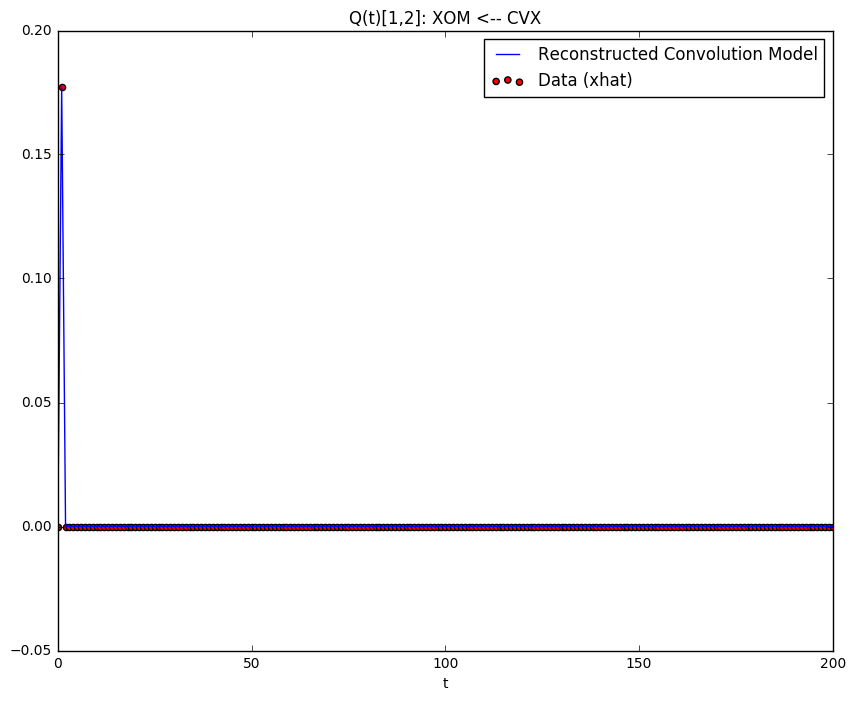

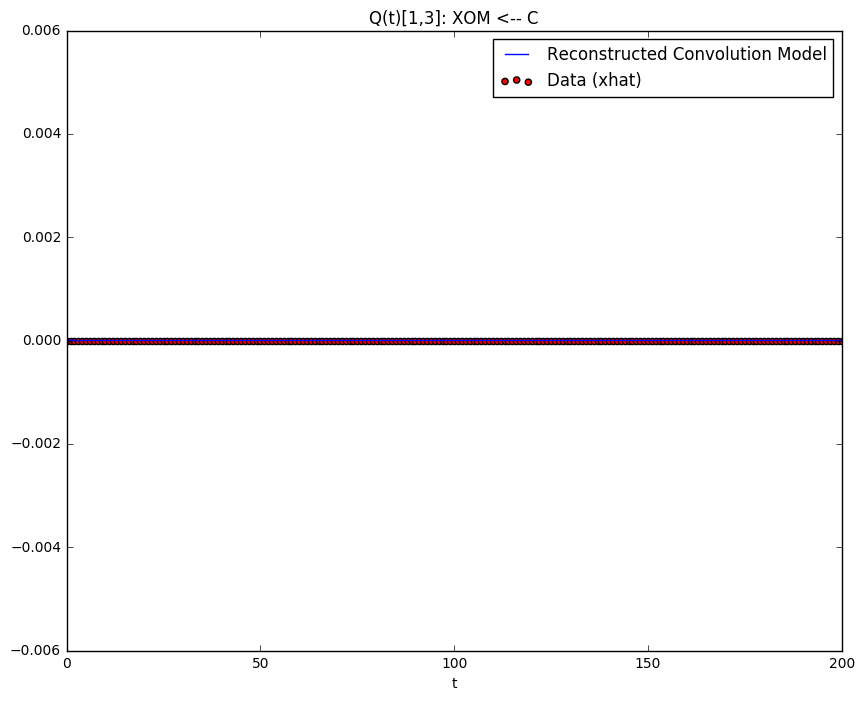

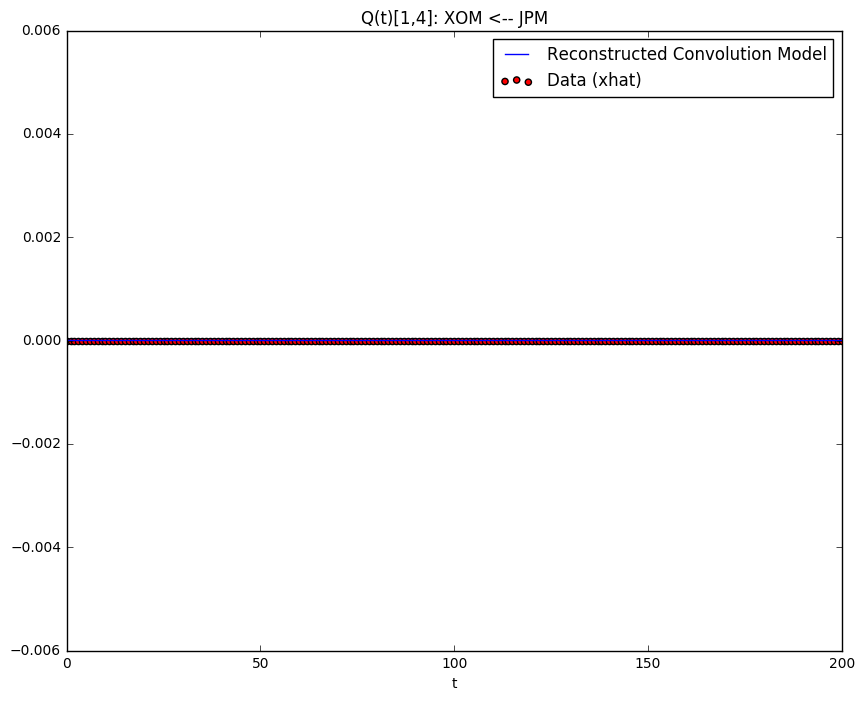

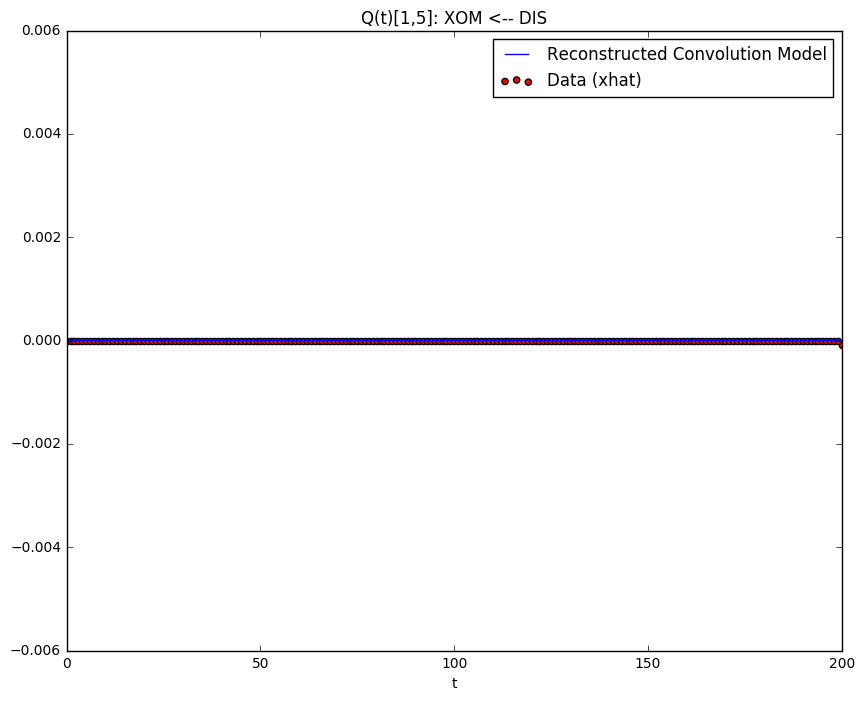

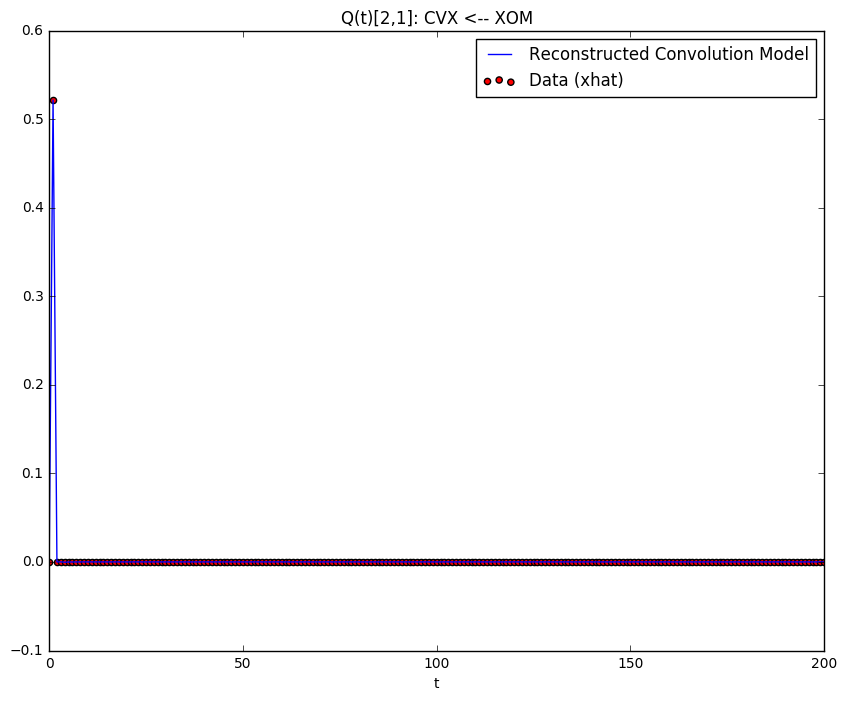

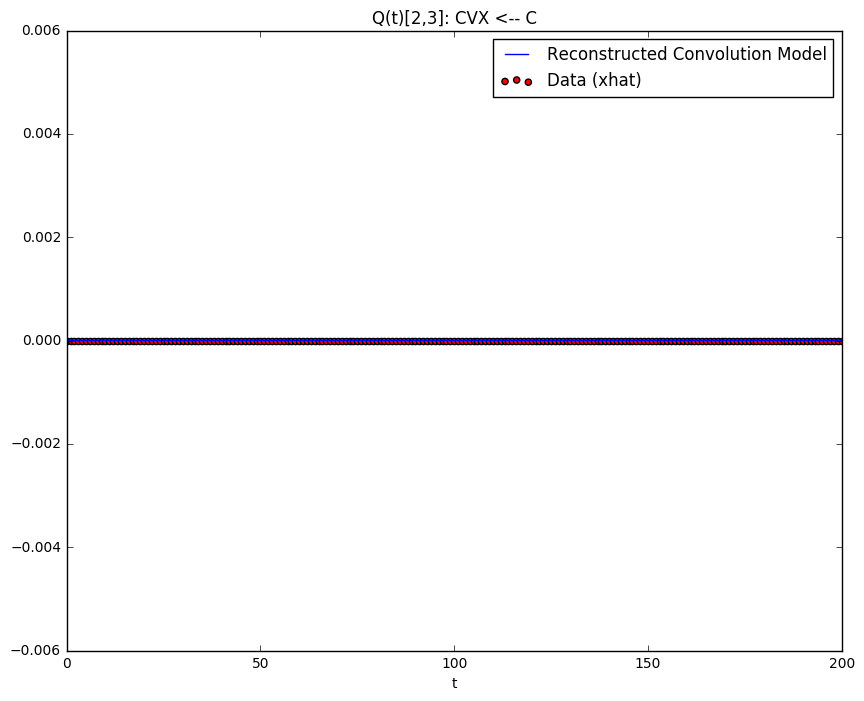

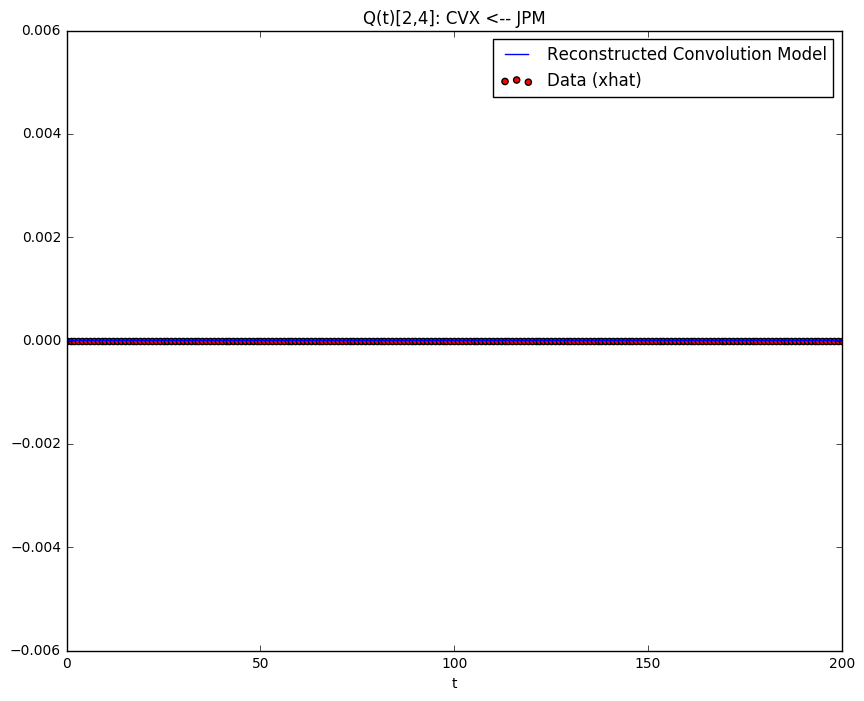

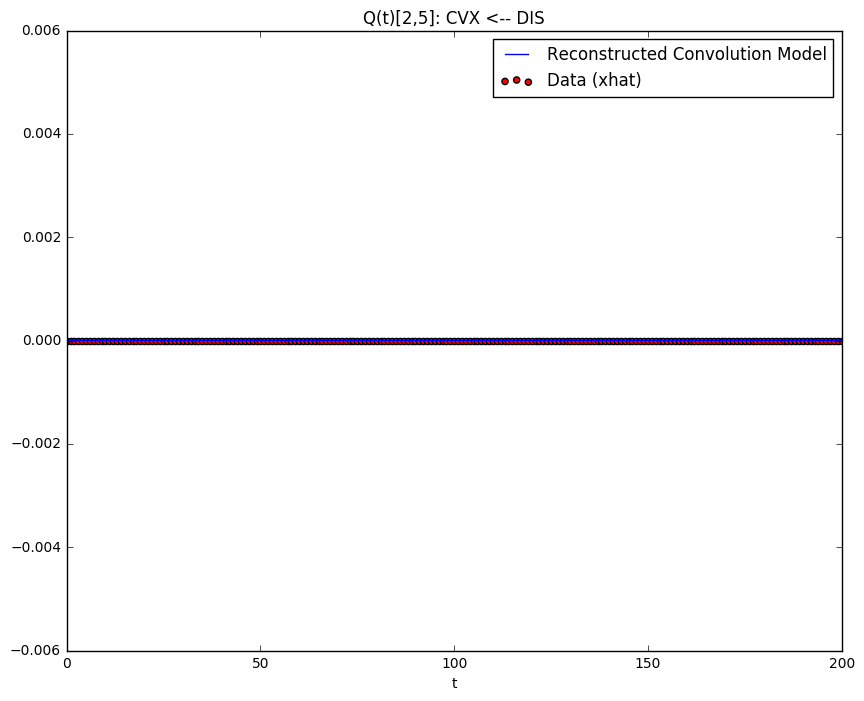

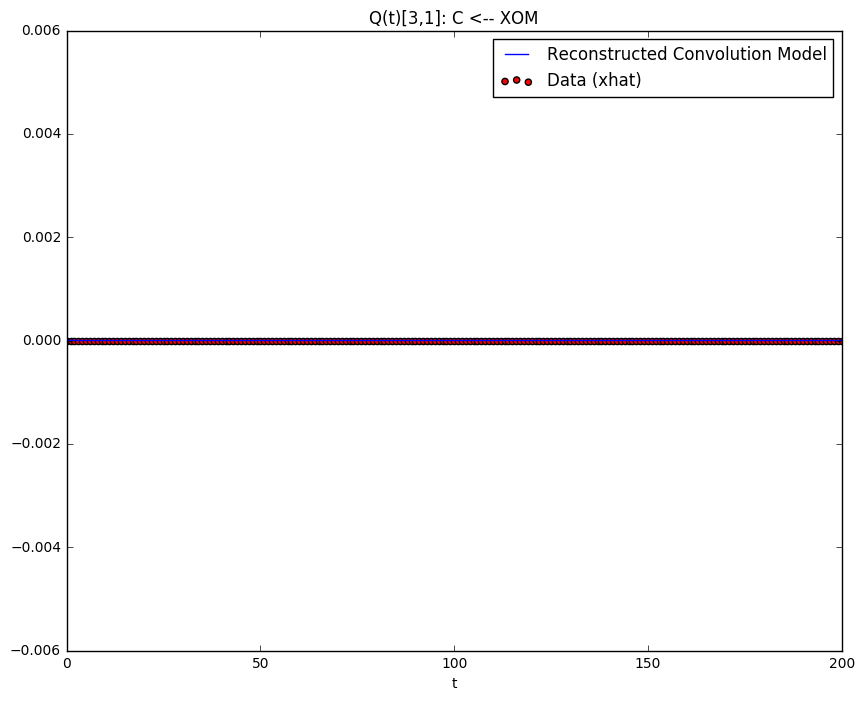

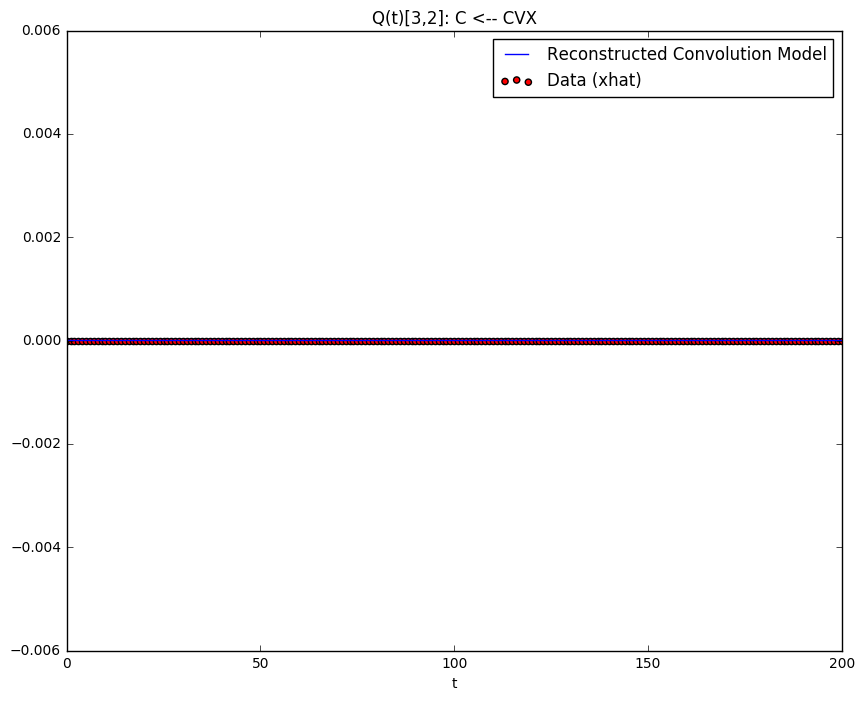

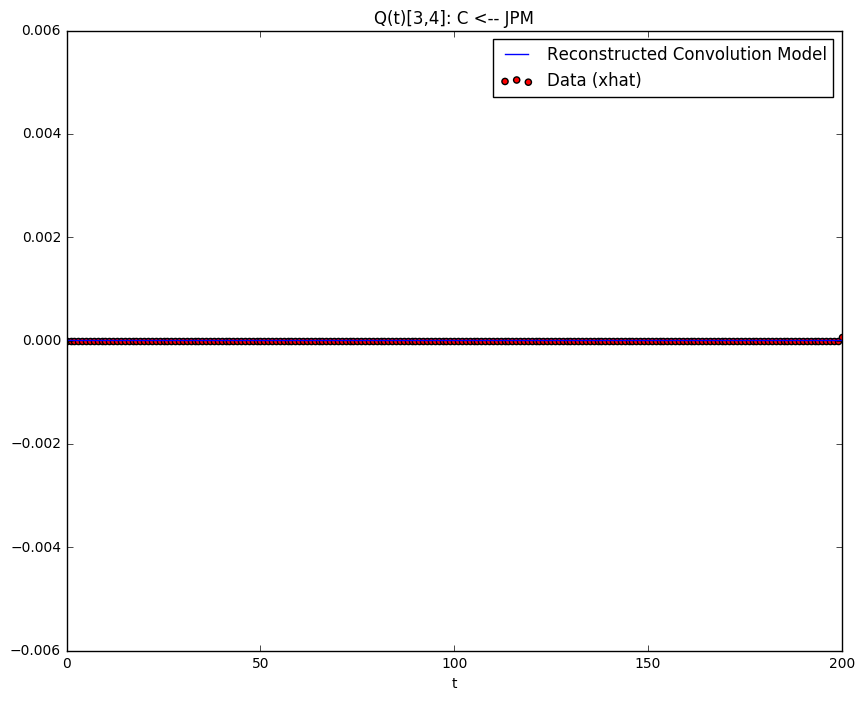

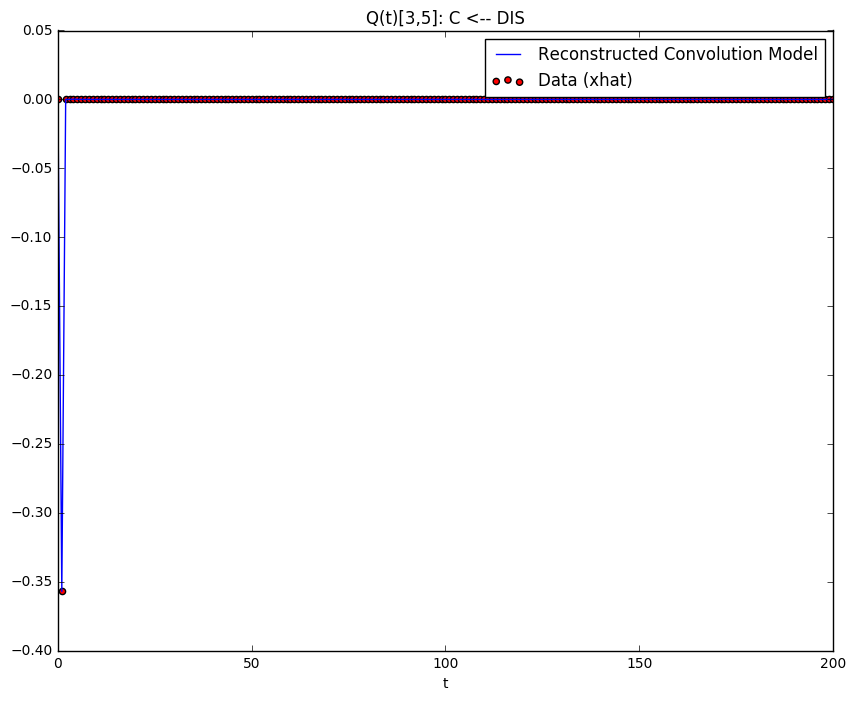

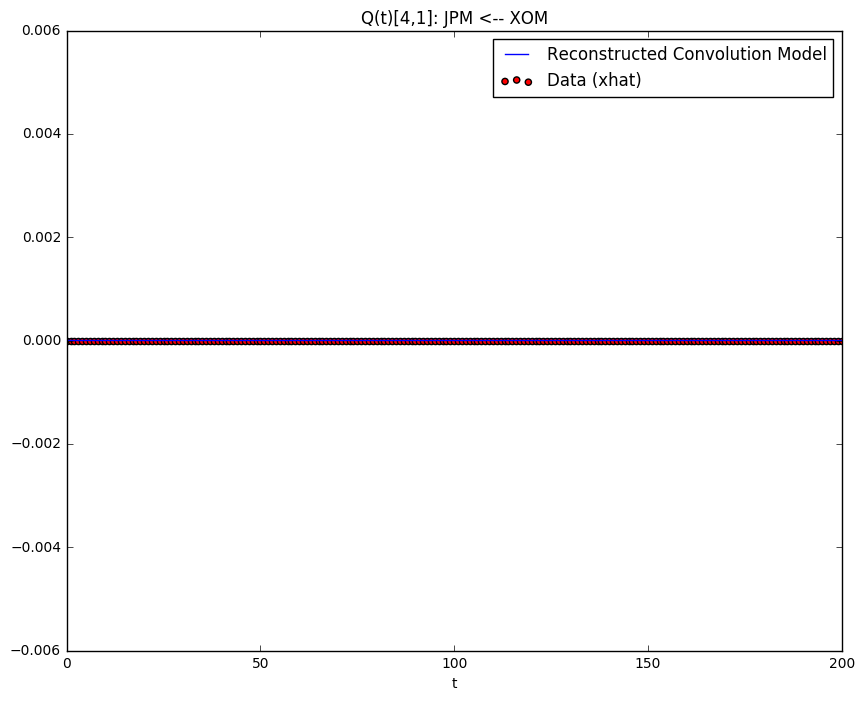

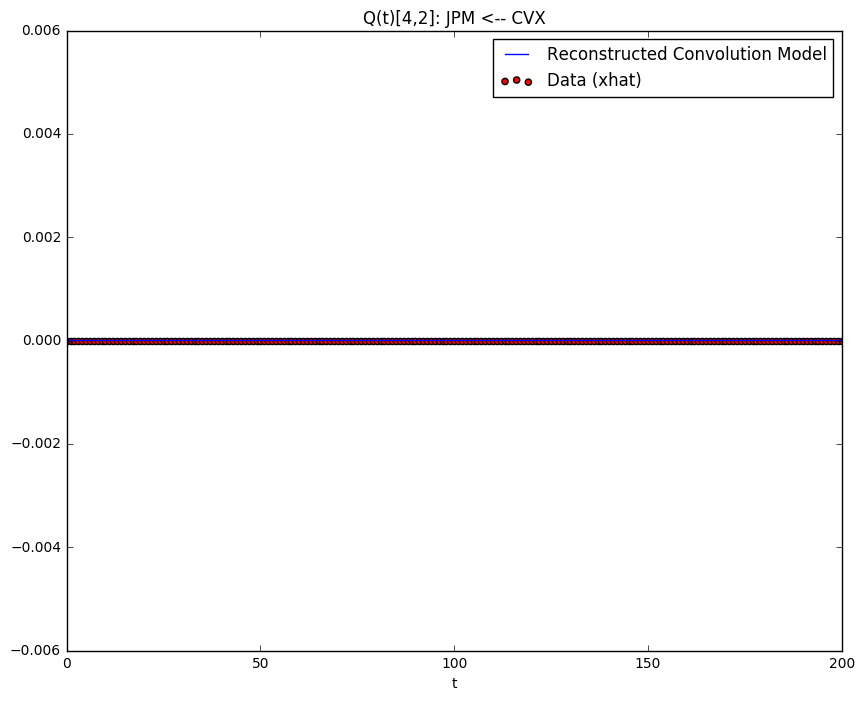

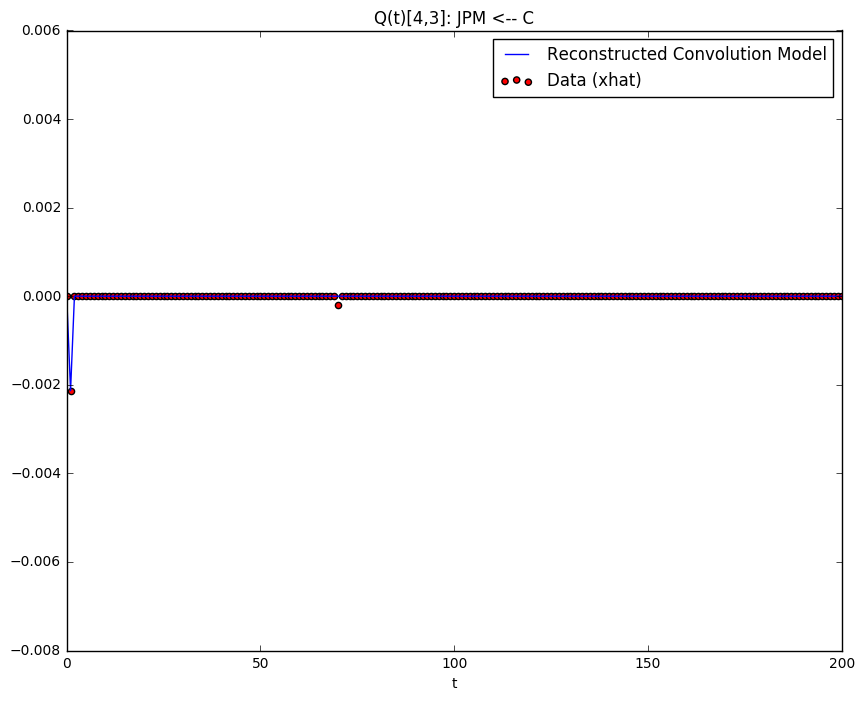

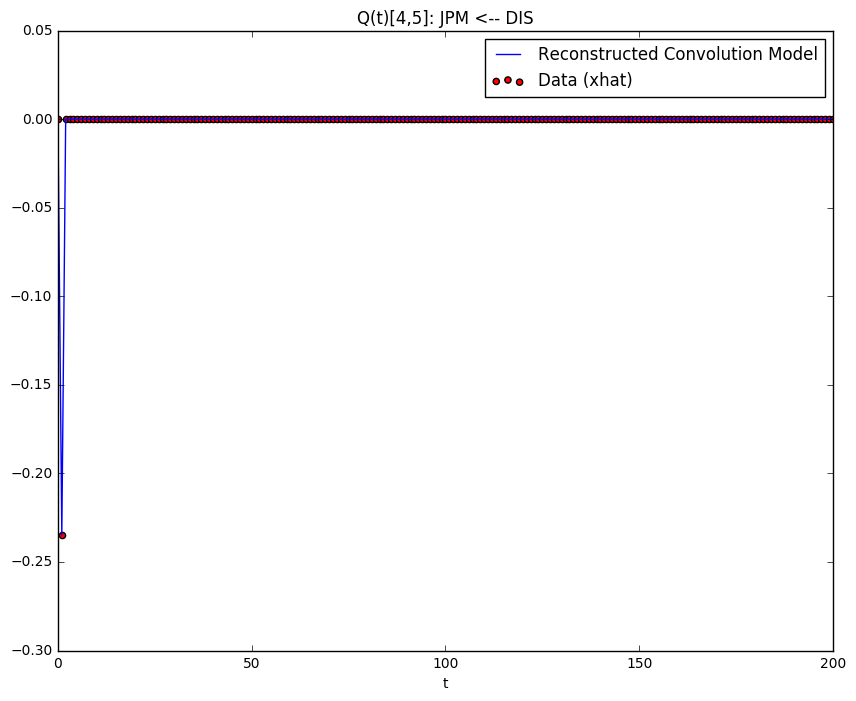

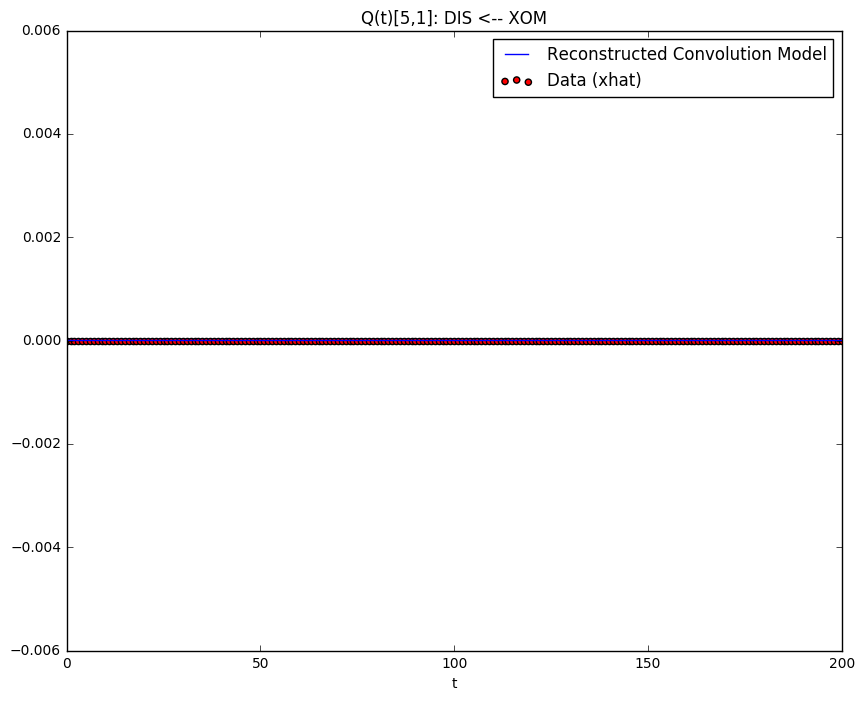

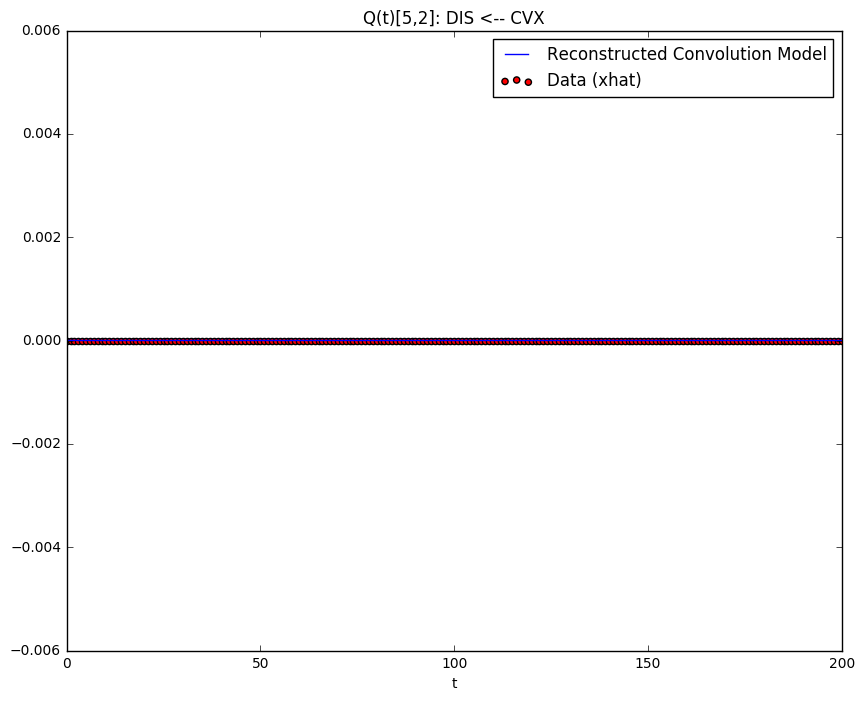

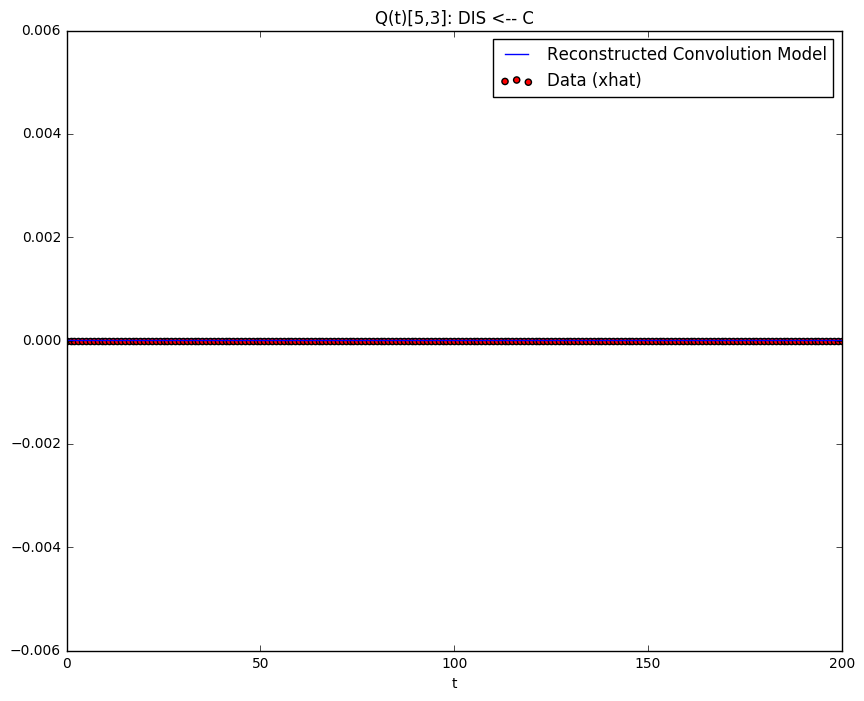

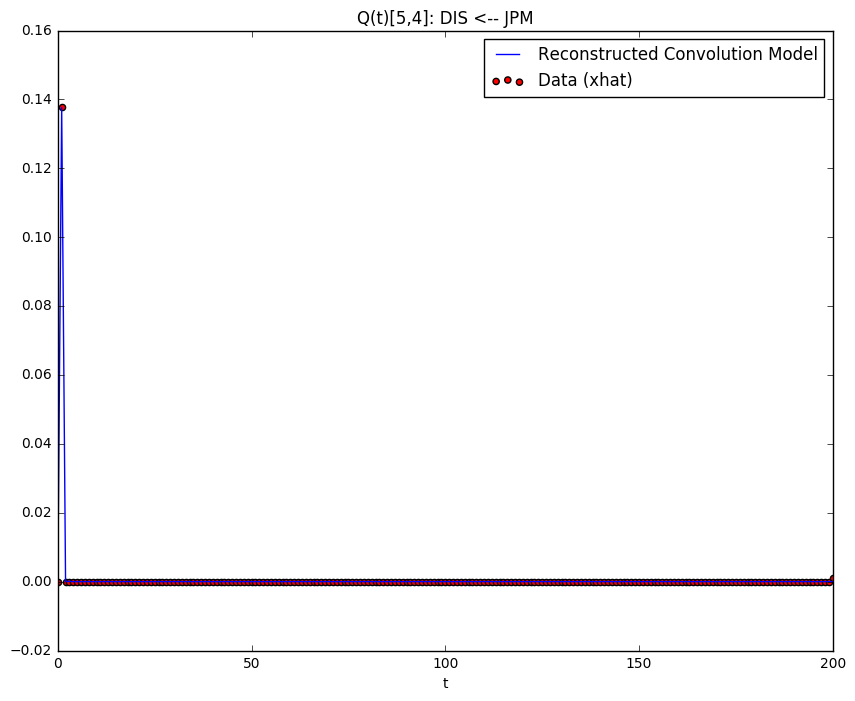

In [4]:
titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [5]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-2.52566899079 -0.00590720430011 -0.114662836225 0.0579124146406 -2.29770467226 -0.0226462781919 8.28817028705 0.0141113739196 ; 0.0596840960346 -0.0203397567741 -1.89889457533 -0.030786636826 1.49483347653 -0.0348005685911 -0.947544611167 0.00551425600114 ; 0.173024965023 0.00270420928049 0.131124855948 0.00732228333776 -0.980310022285 0.000480593297945 -0.103296717885 0.0092635818969 ; 0.0539699628642 -0.0158467134468 0.414793083304 0.0135901889874 -0.261975497366 0.01859941345 0.00801026821677 0.0113221827647 ; -0.104534496654 0.251546391525 1.60652623379 0.0856788963324 -6.25820871434 -0.0423157113633 3.50246912019 0.0414862232954 ; 0.03248575581 -0.0110588047518 -0.198649965132 0.00203778764035 -0.191030077171 -0.00403889542844 0.0100761079327 -0.000744914856829 ; 0.0752061503893 -0.000735435938893 -0.0408484493303 -0.00112151416017 6.57339839274e-05 0.00921316181196 0.0979042571126 9.08117492574e-05 ; 0.0806388641142 0.00523729132554 -0.0396131521473 0.0138951554